<br>

# Project: Invistigating TMDB

<a id='intro'></a>
# Introduction

## Research Question: What makes a movie more popular than others? 
**Dependant variable:** popularity<br>
<br>
**Independant Valriables:** genres, vote_average and release_year (in which era)

*Note: I mean by era (period of 10 years time) : 60's, 70's, 80's, 90s*, 2000-2010, 2010-2015

### Investigation Questions :
- What is the disribution of popularity?  - Is it different in from a time era to another?
- How is the number of released movies changed over time?
- Does popularity correlate with number of released movies per year?
- Do famous category movies tend to get higher score by the audience more than movies with lower popularity categories?


-------------------------------------------------------------------------------------------

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Preminaly">Preminaly Data Inspection</a></li>
<li><a href="#Data Wrangling">Data Wrangling</a></li>
    <ul><li><a href="#Cleaning">Cleaning Process</a></li>
        <li><a href="#DeDup">DeDup</a></li>
        <li><a href="#Trimming">Trimming outliers</a></li>
    </ul>    
<li><a href="#Feature Engineering">Feature Engineering</a></li>
    <ul><li><a href="#Task1">Add column "popular_intrvl" [Categorical]</a></li>
        <li><a href="#Task2">Add column "vote_count_intrvl" [Categorical]</a></li>
        <li><a href="#Task3">Add column "vote_stars" [Categorical]</a></li>
        <li><a href="#Task4">Add column "era" [Categorical]</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul><li><a href="#ea1">What is the disribution of popularity?</a></li>
        <li><a href="#ea2">How is the number of released movies changed over time?</a></li>
        <li><a href="#ea3">Does popularity correlate with number of released movies per year?</a></li>
        <li><a href="#ea4">Do famous category movies tend to get higher score?</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

-------------------------------------------------------------------------------------------

<a id='Preminaly'></a>

## Preminaly Data Inspection

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The dataset has 10866 rows (records) and 12 columns (fields)<br> Data types in the dataset are: float, int, and objects.<br><br>
Objects could be pointers to strings<br><br>
**Let's inspect which fields whose data type is string**

In [5]:
for i, col in enumerate(df.columns):
    print(i, type(df[col][0]))

0 <class 'numpy.int64'>
1 <class 'str'>
2 <class 'numpy.float64'>
3 <class 'numpy.int64'>
4 <class 'numpy.int64'>
5 <class 'str'>
6 <class 'str'>
7 <class 'str'>
8 <class 'str'>
9 <class 'str'>
10 <class 'str'>
11 <class 'str'>
12 <class 'numpy.int64'>
13 <class 'str'>
14 <class 'str'>
15 <class 'str'>
16 <class 'numpy.int64'>
17 <class 'numpy.float64'>
18 <class 'numpy.int64'>
19 <class 'numpy.float64'>
20 <class 'numpy.float64'>


The data types of all non-int and non-float fields are *strings*    
<br>

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


*There are strange values such as 0 budget or 0 revenue. Also, there are skewed distributions.*
<br><br>


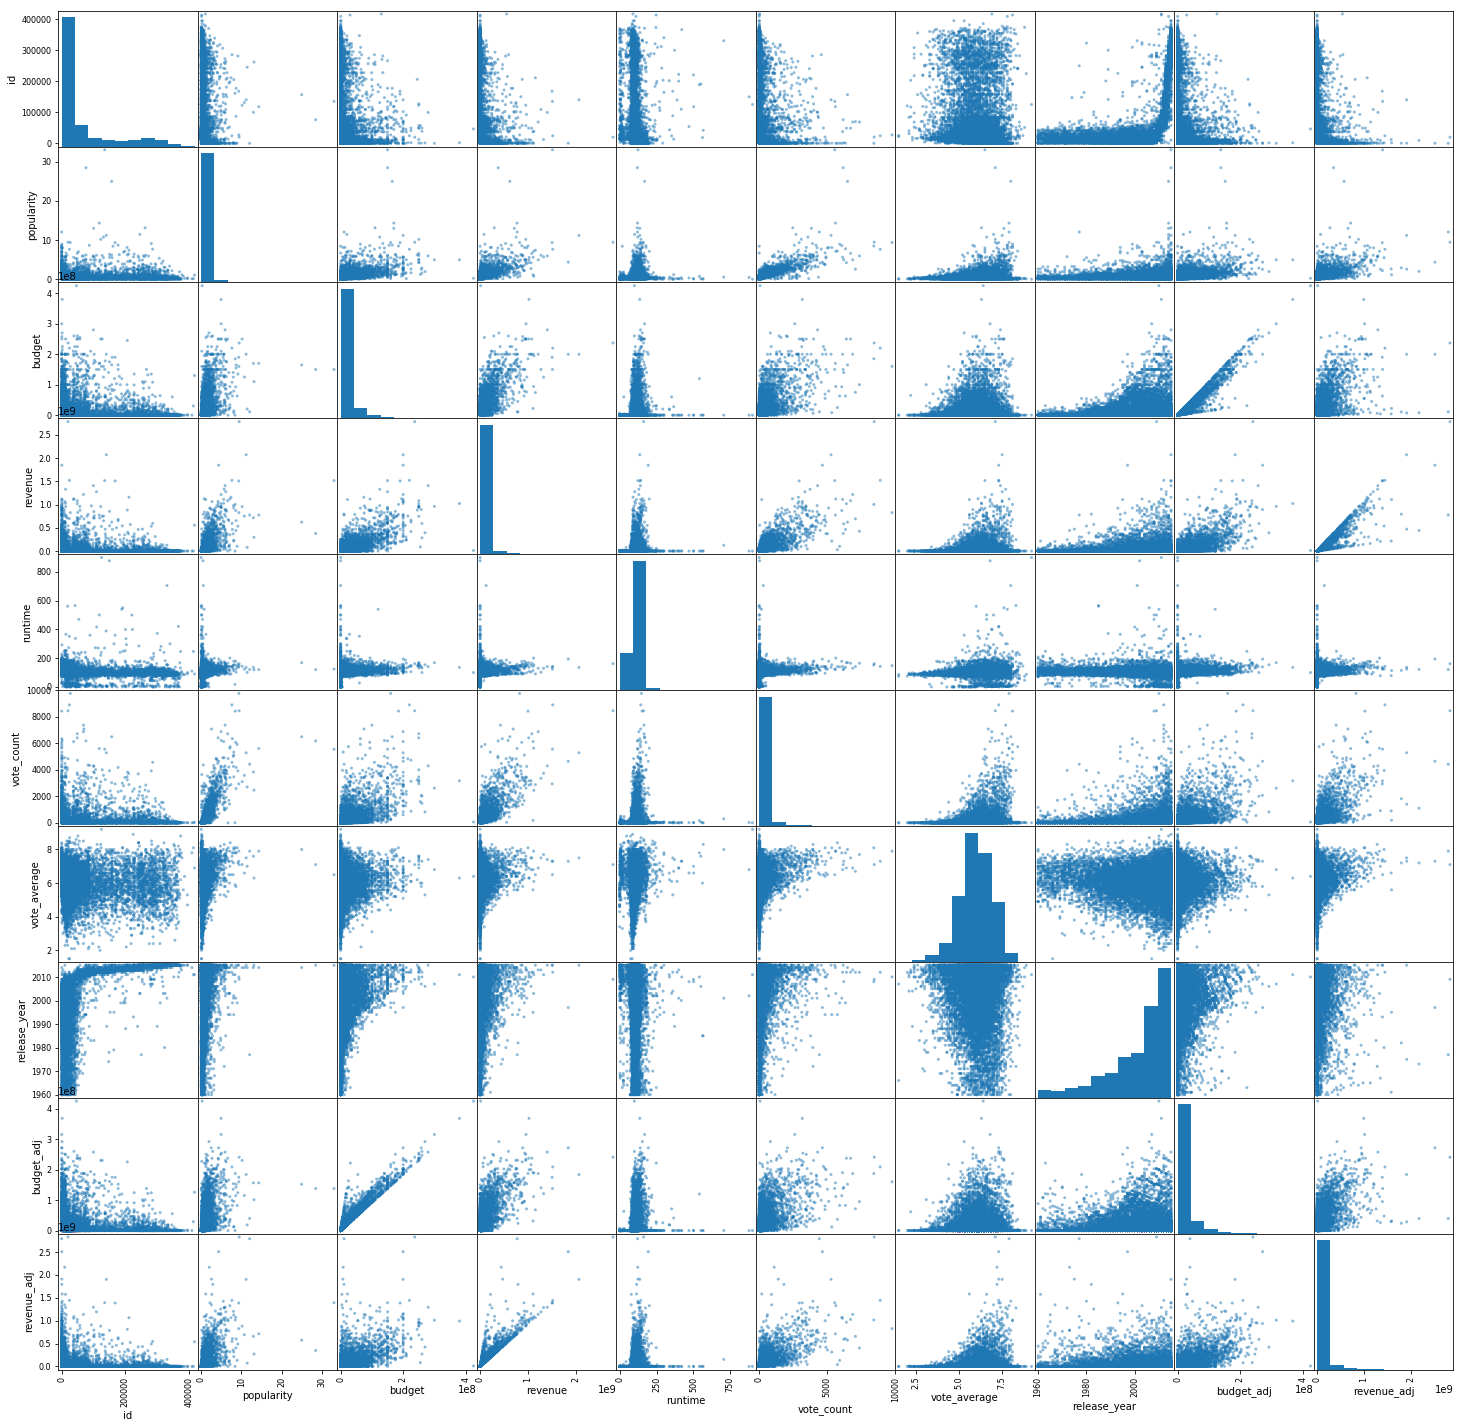

In [7]:
#Plot a inter-variable matrix of scatter plots (diagonal plots are histograms) 
pd.plotting.scatter_matrix(df, figsize=(25,25));

<a id='Data Wrangling'></a>
# Data Wrangling


<a id='Cleaning'></a>
## 1- Cleaning Process

### *Let' drop columns that we don't neeed in our analysis*, 

In [8]:
df.drop(columns=['homepage', 'tagline', 'overview', 'runtime', 'production_companies', 'director', 'cast', 'keywords', 'id', 'imdb_id', 'release_date','budget', 'revenue', 'budget_adj', 'revenue_adj'], inplace=True)

### Let's see where the missing values reside and how many they are 

In [9]:
df.isna().sum()

popularity         0
original_title     0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

Missing values are in (genres) column and their count is 23.

### Let's remove rows with missing values

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(10843, 6)

<a id='DeDube'></a>

## 2- Dedube

### Let's see if the data set has duplicate rows

In [12]:
df.duplicated().sum()

1

One duplicate

### Let's remove duplicates with missing values

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
#check that duplicates are removed
df.duplicated().any()

False

In [15]:
df.shape

(10842, 6)

<a id='Trimming'></a>
##  3- Trimming outliers

### Let's see the disribution of popularity

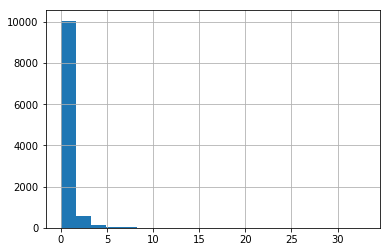

In [16]:
#Plotting histogram.
df.popularity.hist(bins=20);

It's Right skewed. There are points with large values<br><br>

In [17]:
#skewness index of the distribution of popularity
df.popularity.skew()

9.8703105284816743

Skewness index = 9.8, which indicates strong skewness (normal btw 1 and -1)

### Let's look at outliers in box plot

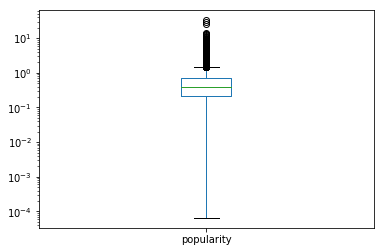

In [18]:
df.popularity.plot.box(logy=True);

Box plot show us that there are large number of outliers above the (q3 + 1.5 * IQR) limit (This limit is shown  in the figure as small horizontal line above the rectangle), where q3 is the 3rd quantile (75% of the points are below this value). 

IQR is the range between q1, 1st quantile (25% of the points are below this value)) and 3rd quantile. 50% of the points, their values reside in IQR range.

q1 and q3 are the upper and lower sides of the rectangle shown in the firuge
<br><br>
**According to the statistics rules: Outliers are the points with values above (q3 + 1.5 * IQR) or below (q1 - 1.5 * IQR)**


In [19]:
#print statistics of popularity
#25% means q1 (first quantile)
#75% means q3 (third quantile)
df.popularity.describe()

count    10842.000000
mean         0.647461
std          1.001032
min          0.000065
25%          0.208210
50%          0.384532
75%          0.715393
max         32.985763
Name: popularity, dtype: float64

### Before we trim these outliers: 

Let's ask ourselves a question: **May be these outliers belong to certian group of points**

We will investigate this in more details later in the Exploratory Data Analysis 

-------------------------------------------------------------------------------------------

<a id='Feature Engineering'></a>
## Feature Engineering

<ol> 
    <li>I'll add four columns which are a catogerical version of the following columns respectively:</li>
        <ol>
            <li>popularity</li>
            <li>vote_count</li>
            <li>vote_average</li>
            <li>release year</li>
        </ol><br>
    The new columns are:
        <ol> 
            <li>popular_intrvl: has 5 categories: (60's, 70's, 80's, 90's, 21th Century)</li>
            <li>vote_count_intrval:has 5 categories: has 5 categories: (60's, 70's, 80's, 90's, 21th Century)</li>
            <li>vote_average: has 5 categories: (60's, 70's, 80's, 90's, 21th Century)</li>
            <li>era which has 5 categories: (60's, 70's, 80's, 90's, 21th Century)</li>
        </ol><br>
    <li>Also, I'll create a set of the genres</li>
</ol>

<a id='Task1'></a>
### 1.A: Add new column "popular_intrvl" [Categorial]

In [20]:
df.popularity.describe()

count    10842.000000
mean         0.647461
std          1.001032
min          0.000065
25%          0.208210
50%          0.384532
75%          0.715393
max         32.985763
Name: popularity, dtype: float64

In [21]:
bins = pd.IntervalIndex.from_tuples([(0.0, 0.208), (0.208, 0.385), (0.385, 0.715), (0.715, 1.476), (1.476, 33)])
df['popular_intrvl'] = pd.cut(df['popularity'], bins, labels=['not popular', 'known', 'well known', 'famous', 'ultra famous'])

I made intervals based on the quantiles.<br>1.476 is the IQR upper limit:

IQR = 0.715 - 0.208 = 0.507<br><br>
upper limit = 0.715 + (1.5 x IQR)
<br>upper limit = 0.715 + (1.5 x 0.507)
<br>upper limit = 1.476


In [22]:
df['popular_intrvl'].value_counts().sort_index()

(0.0, 0.208]      2709
(0.208, 0.385]    2720
(0.385, 0.715]    2701
(0.715, 1.476]    1770
(1.476, 33.0]      942
Name: popular_intrvl, dtype: int64

<a id='Task2'></a>
### 1.B: Add new column vote_count_intrvl [Categorical]

In [23]:
df.vote_count.describe()

count    10842.000000
mean       217.823649
std        576.180993
min         10.000000
25%         17.000000
50%         38.000000
75%        146.000000
max       9767.000000
Name: vote_count, dtype: float64

In [24]:
bins = pd.IntervalIndex.from_tuples([(9, 17), (17, 38), (38, 146), (146, 194), (194, 9767)])
x = pd.cut(df['vote_count'], bins, labels=['very few', 'few', 'average','many', 'Soo many'])

x.categories = ['very few', 'few', 'average','many', 'Soo many']
df['vote_count_intrvl'] = x

I made intervals based on: minimum, q1, median, q3, IQR upper limit, and the maximum.<br>146 is the IQR upper limit:

IQR = 146 - 17 = 129<br><br>
upper limit = 146 + (1.5 x IQR)
<br>upper limit = 146 + (1.5 x 129)
<br>upper limit = 340


In [25]:
df['vote_count_intrvl'].value_counts().sort_index()

(9, 17]        2906
(17, 38]       2531
(38, 146]      2703
(146, 194]      457
(194, 9767]    2245
Name: vote_count_intrvl, dtype: int64

<a id='Task3'></a>
### 1.C: Add new column vote_starts [Categorial]

Movie get starts according the average positivity (or negativity) of audience votes (from 1 start to maximum 10 starts). 

In [26]:
df.vote_average.describe()

count    10842.000000
mean         5.974064
std          0.934257
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [27]:
labels = ['soo bad', 'very bad', 'bad', "don't like", 'good', 'very good', 'great', 'AWSOME']
df['vote_stars'] = pd.cut(df['vote_average'], range(1, 10), right=False, labels=labels)

The categories from lowest rate to the highest rate:<br>
'soo bad',
'very bad',
'bad',
'don't like',
'good',
'very good',
'great', and
'AWSOME'.


In [28]:
df['vote_stars'].value_counts().sort_index()

soo bad          2
very bad        40
bad            229
don't like    1149
good          3627
very good     4242
great         1464
AWSOME          88
Name: vote_stars, dtype: int64

<a id='Task4'></a>
### 1.D: Add column 'era' [Categorical]

In [32]:
df['release_year'].describe()

count    10842.000000
mean      2001.314794
std         12.813617
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

In [34]:
bins = [1959, 1970, 1980, 1990, 2000, 2010, 2016]
labels = ['60s', '70s', '80s', "90s", '2000-2010', '2010-2015']
df['era'] = pd.cut(df['release_year'], bins = bins, right=False, labels=labels)

df['era'].value_counts().sort_index()

60s           362
70s           506
80s          1062
90s          1763
2000-2010    3556
2010-2015    3593
Name: era, dtype: int64

<br>
I'll save the dataframe after this step to a csv file in order to keep the updates I made to the data frame
<br>


In [36]:
df.to_csv('tmdb_v2.csv', encoding='utf-8', index=False)

<br><br>

### Load the processed data frame

In [37]:
df = pd.read_csv('tmdb_v2.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10842 entries, 0 to 10841
Data columns (total 10 columns):
popularity           10842 non-null float64
original_title       10842 non-null object
genres               10842 non-null object
vote_count           10842 non-null int64
vote_average         10842 non-null float64
release_year         10842 non-null int64
popular_intrvl       10842 non-null object
vote_count_intrvl    10842 non-null object
vote_stars           10841 non-null object
era                  10842 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 847.1+ KB


<a id='eda'></a>
# Expolatory Analysis

## Investigations:
<ul>
    <li>What is the disribution of popularity? and is it different from a time era to another?</li>
    <li>How is the number of released movies changed over time?</li>
    <li>Does popularity correlate with number of released movies per year</li>
    <li>Do famous category movies tend to get higher score by the audience more than movies with lower popularity categories?</li>
</ul>

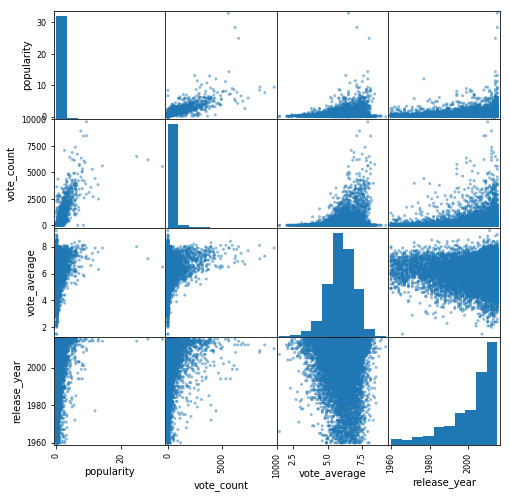

In [39]:
pd.plotting.scatter_matrix(df, figsize=(8,8));

<a id='ea1'></a>
## What is the disribution of popularity?  - Is it different in from a time era to another?

### Are the outliers in popularity belong to certian movie group?

In [98]:
df['popular_intrvl'].value_counts()

(0.208, 0.385]    2720
(0.0, 0.208]      2709
(0.385, 0.715]    2701
(0.715, 1.476]    1770
(1.476, 33.0]      942
Name: popular_intrvl, dtype: int64

In [119]:
df['popular_intrvl'].unique()

array(['(1.476, 33.0]', '(0.715, 1.476]', '(0.385, 0.715]',
       '(0.208, 0.385]', '(0.0, 0.208]'], dtype=object)

Outlier values are greater than 1.476, which is in (1.476, 33.0].<br> We call them **ultra famous** movies throughout this analysis and they reside in the first item (interval) in the above list<br><br>
*Note:The 'popular_intrvl' field has categorical values **['not popular', 'known', 'well known', 'famous', 'ultra famous']** that correspond to one interval of values in 'popularity' field*<br><br>

In [150]:
ultra_famous = (df['popular_intrvl'] == df['popular_intrvl'].unique()[0])
df[ultra_famous].popular_intrvl.count()

942

This is the number of outliers **ultra famous** movies

There are 949 **"ultra famous"** movies. Lets see whether they belong to certain **time eras**

*Note: I call popularity outliers **ultra famous** movies. They are in (1.476, 33.0] interval which is above IQR we calculated above.*


In [87]:
df_60s = df[(df['era'] == '60s')]
df_70s = df[(df['era'] == '70s')]
df_80s = df[(df['era'] == '80s')]
df_90s = df[(df['era'] == '90s')]
df_2000 = df[(df['era'] == '2000-2010')]
df_2010 = df[(df['era'] == '2010-2015')]

In [101]:
df_2000['popular_intrvl'].value_counts()

(0.385, 0.715]    928
(0.208, 0.385]    862
(0.0, 0.208]      828
(0.715, 1.476]    625
(1.476, 33.0]     313
Name: popular_intrvl, dtype: int64

In [104]:
df_2010['popular_intrvl'].value_counts()[-1]

416

In 2000-2010 era, the count of **ultra famous** movies (last interval/category) is 313
In 2010-2015 era, the count of **ultra famous** movies is 416<br> 

313 + 416 = 729 which is %77.4 of ultra famous movies are in the latest two era (from 2000 to 2025)<br>
Therefore we conclude that latest movies are more popular than older ones

- Lets see the visuals:

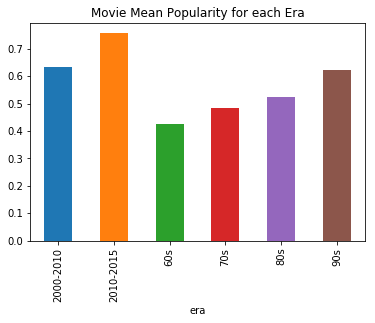

In [212]:
df.groupby('era').popularity.mean().plot(kind='bar', title='Movie Mean Popularity for each Era');

- The figure tells us that movies released in latest era have high average popularity.

Lets see the accurate values of the mean popularity

In [253]:
df.groupby('era').popularity.mean()

era
2000-2010    0.632699
2010-2015    0.756405
60s          0.424244
70s          0.485495
80s          0.524726
90s          0.621460
Name: popularity, dtype: float64

- Movies released in 2010-2015 era tend to be more popular than others

### Let's plot the share of  every era of Ultra Famous movies

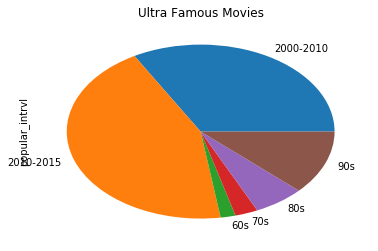

In [245]:
df[ultra_famous].groupby(by='era').popular_intrvl.count().plot(kind='pie', title ='Ultra Famous Movies');

In [169]:
famous = (df['popular_intrvl'] == df['popular_intrvl'].unique()[1])
well_known = (df['popular_intrvl'] == df['popular_intrvl'].unique()[2])
known = (df['popular_intrvl'] == df['popular_intrvl'].unique()[3])
not_popular = (df['popular_intrvl'] == df['popular_intrvl'].unique()[4])

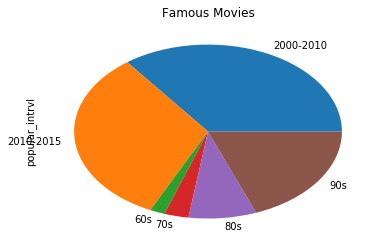

In [205]:
df[famous].groupby(['era']).popular_intrvl.count().plot(kind='pie', title='Famous Movies');

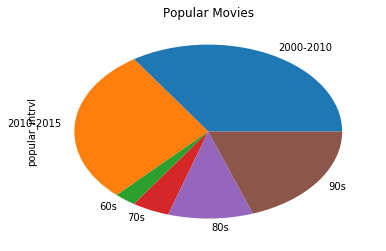

In [206]:
df[well_known].groupby(['era']).popular_intrvl.count().plot(kind='pie', title='Popular Movies');

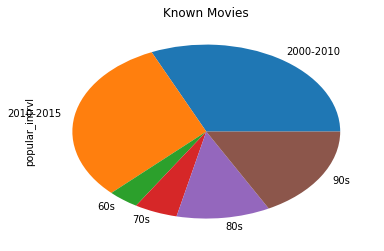

In [209]:
df[known].groupby(['era']).popular_intrvl.count().plot(kind='pie', title='Known Movies');

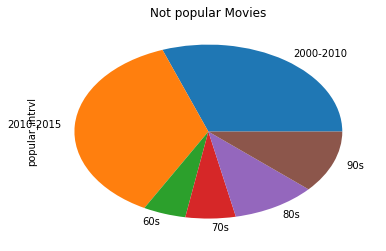

In [210]:
df[not_popular].groupby(['era']).popular_intrvl.count().plot(kind='pie', title='Not popular Movies');

### Answer: Distribution of popularity
- The distribution of popularity is strongly right skewed
- The biggest share of The Ultra Famous Movie belongs to released between years 2010 and 2015
- Latest movies tends to be more popular than older ones
<br>

-------------------------------------------------------------------------------------------

<a id='ea2'></a>
## How is the number of released movies changed over time?<br>


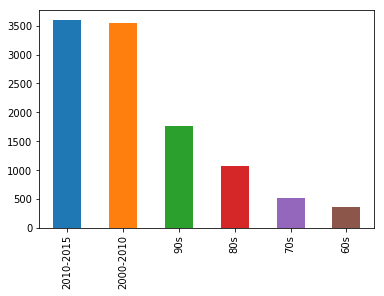

In [50]:
df['era'].value_counts().plot(kind='bar');

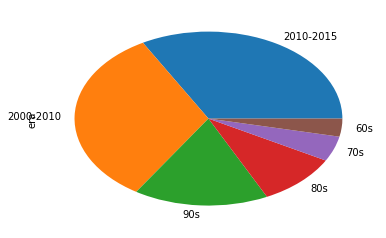

In [246]:
df['era'].value_counts().plot(kind='pie');

### Answer:
The number of the released movies increases exponetialy with time. We see that most of the movies in the TMDB are released from year 2000 to year 2015. 

-------------------------------------------------------------------------------------------

<a id='e32'></a>
## Does popularity correlate with number of released movies per year?

### Let see what scatter plot tells us

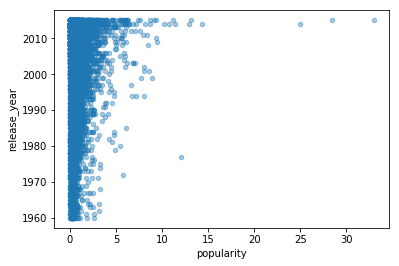

In [190]:
df.plot('popularity', 'release_year', kind='scatter', alpha=0.4);

It's not clear because the points with very large number.
<br>
### Lets trim popularity points whose value above 1.5 inorder to see better plot<br>

In [199]:
df['popularity'].describe()

count    10842.000000
mean         0.647461
std          1.001032
min          0.000065
25%          0.208210
50%          0.384532
75%          0.715393
max         32.985763
Name: popularity, dtype: float64

In [200]:
df_trim = df[(df['popularity'] <= 1.5 )]

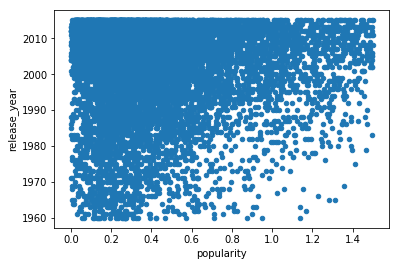

In [201]:
df_trim.plot(x='popularity', y='release_year', kind='scatter');

### Answer:
No correlattion btw popularity and the number of released movies per year.

-------------------------------------------------------------------------------------------

<a id='ea4'></a>
## Do famous movies tend to get higher score by the audience more than movies with lower popularity categories?

We have added "vote_star" field that represents how the audience rated the movie. <br>
The categories from lowest rate to the highest rate:<br>
'soo bad',
'very bad',
'bad',
'don't like',
'good',
'very good',
'great', and
'AWSOME'.

Let's see if there is correlation btw popularity and vote_stars

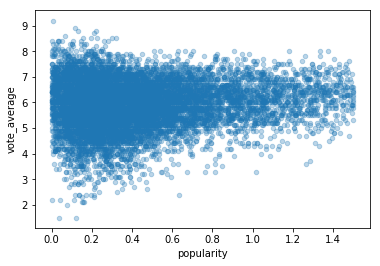

In [258]:
df_trim.plot(x='popularity', y='vote_average', alpha=0.3, kind='scatter');

- Could be a correlation but I'm not sure

### Let's try bar plot and groupby('popular_intrvl')

In [285]:
df[famous | well_known].groupby('popular_intrvl').vote_stars.value_counts()

popular_intrvl  vote_stars
(0.385, 0.715]  very good     1075
                good          1027
                don't like     284
                great          263
                bad             42
                AWSOME           5
                very bad         5
(0.715, 1.476]  very good      838
                good           589
                great          236
                don't like      91
                bad             12
                AWSOME           4
Name: vote_stars, dtype: int64

### Lets calculate the percentage

In [287]:
df[famous | well_known].groupby('popular_intrvl').vote_stars.value_counts().div(df['popular_intrvl'].value_counts(), level='popular_intrvl') * 100 

popular_intrvl  vote_stars
(0.385, 0.715]  very good     39.800074
                good          38.022954
                don't like    10.514624
                great          9.737134
                bad            1.554980
                AWSOME         0.185117
                very bad       0.185117
(0.715, 1.476]  very good     47.344633
                good          33.276836
                great         13.333333
                don't like     5.141243
                bad            0.677966
                AWSOME         0.225989
dtype: float64

(0.385, 0.715] is: famous category<br>
(0.715, 1.476] is: well_known category

**~10% of well-known movies is rated (great) by the audience**<br>
**40% of well-known movies is rated (very good) by the audience**<br>
**38% of well-known movies is rated (good) by the audience**<br>

**13% of famous movies is rated (great) by the audience**<br>
**47% of famous movies is rated (very good) by the audience**<br>
**33% of famous movies is rated (good) by the audience**<br>

- **47%** famous movies scored **very good** while **40%** of well_known movies scored very good

### Let's compare with other categories using bar plots

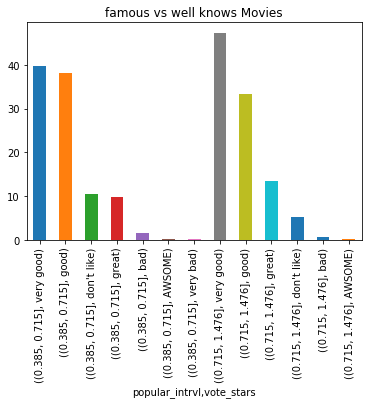

In [291]:
(df[famous | well_known].groupby('popular_intrvl').vote_stars.value_counts().div(df['popular_intrvl'].value_counts(), level='popular_intrvl') * 100).plot(kind='bar', title='famous vs well knows Movies');

We see from the figure that famous movies (right handside bars: gray, yellow, light blue, blue bars) gained higher score than well-known (less popular) movies (left handside).

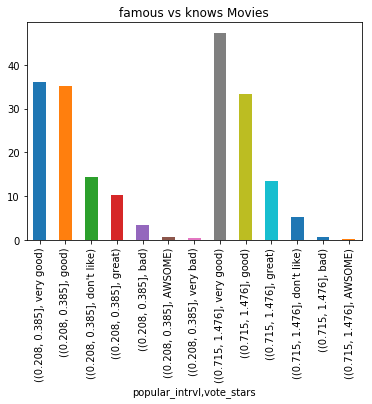

In [292]:
(df[famous | known].groupby('popular_intrvl').vote_stars.value_counts().div(df['popular_intrvl'].value_counts(), level='popular_intrvl') * 100).plot(kind='bar', title='famous vs known Movies');

<br>

We see from the figure that famous movies (right handside bars: gray, yellow, light blue, blue bars) gained higher score than **known** movies (left handside).

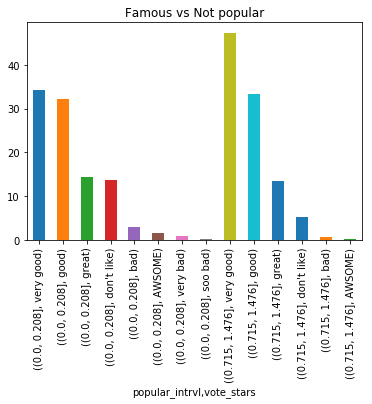

In [293]:
(df[famous | not_popular].groupby('popular_intrvl').vote_stars.value_counts().div(df['popular_intrvl'].value_counts(), level='popular_intrvl') * 100).plot(kind='bar', title='Famous vs Not popular');

We see from the figure that famous movies (right handside bars: yellow, light blue, blue ..etc bars) gained higher scores than **known** movies (left handside).

In [236]:
df['vote_stars'].unique()

array(['very good', 'great', 'good', 'AWSOME', "don't like", 'bad',
       'very bad', nan, 'soo bad'], dtype=object)

### Answer:
Yes. famous category movies tend to get higher score by the audience more than movies with lower popularity categories.

-------------------------------------------------------------------------------------------

<a id='conclusions'></a>
## Conclusions

- The distribution of popularity is strongly right skewed
- The biggest share of most popular movie are released between years 2010 and 2015
- The number of the released movies increases exponetialy with time,
- Most of the movies in the TMDB are released from year 2000 to year 2015.
- No correlattion found between popularity and the number of released movies per year.
- Very popular movies tend to get higher score by the audience than movies with lower popularity.<br>
<br>**Movies that are produced recently tend to be more popular than older ones**